# ANOVA - Analysis of Variance
We will continue our discussion on linear model. Today, we will be learning ANOVA, a generalized form of comparing mean across multiple groups. 
Agenda today:
- Compare t-tests and ANOVA
- Learn to calculate ANOVA & details 
- Implement ANOVA in python
    - using statsmodel
    - from scratch
- Compare linear regression with ANOVA

## Part I. T tests or ANOVA?
Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or cloudy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning having higher chance of making type I error. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of making false positives. How then, can we combat this? -- ANOVA!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T Test statistics 
$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$

#### ANOVA - the F test
$F = \frac{MS_bet}{MS_within}$

We can also say that t test is a special case of ANOVA in that we are comparing the means of only two groups.

## Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X - \bar X_i)^2 $

- $SS_w$ = $\sum (n_i - 1) s_i ^ 2$

- $SS_t$ = $\sum (X_ij - \bar X)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$

Degrees of Freedom for ANOVA:
- DFbetween = k - 1
- DFwithin = N - k
- DFtotal = N - 1

Notations:
- k is the number of groups
- N is the total number of observations
- n is the number of observations in each group

###
Like regression and t-test, we can also perform hypothesis testing with ANOVA. What would be the null hypothesis in this case? 
- $H0 = \mu_1 = \mu_1 = \mu_3 = \mu_4$
- $H_a$ H0 is not true

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


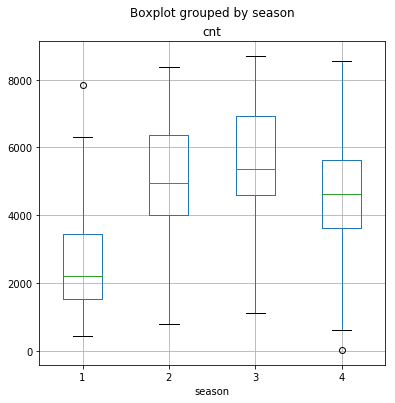

In [2]:
#Create a boxplot
# 1 is spring, 2 is summer, 3 is fall, and 4 is winter
data.boxplot('cnt', by='season', figsize=(6,6))

### 2.2 Calculate ANOVA using statsmodel

In [3]:
# we need to conduct a little bit feature engineering to encode 
data['season_cat'] = data.season.apply(lambda x: 'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x ==3 else 'winter')))

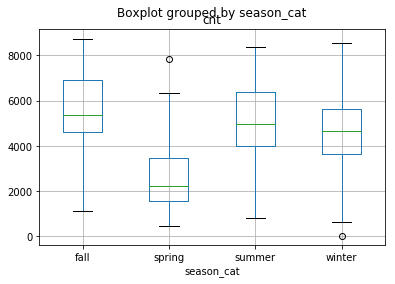

In [4]:
data.boxplot('cnt', by = 'season_cat')

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova_season = ols('cnt~season_cat',data=data).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           6.72e-67
Time:                        11:38:49   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5644.3032    114.407     49.335      0.000    5419.696    5868.910
season_cat[T.spring] -3040.1706    163.352    -18.611      0.000   -3360.869   -2719.472
season_cat[T.summer]  -651.9717    162.673     -4.008      0.000    -971.336    -332.608
season_cat[T.winter]  -916.1403    164.052     -5.584      0.000   -1238.213    -594.068
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.765
Skew:                           0.080   Prob(JB):                        0.251
Kurtosis:                       2.745   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
season_cat    3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual    727.0  1.788940e+09  2.460715e+06         NaN           NaN


## Part III. Comparing Linear Regression to ANOVA
Why can we use ordinary least squares with ANOVA? ANOVA, in fact, can be viewed as a linear regression problem with categorical variable, parametrized as with j levels:
$y_i = \beta_0 + \beta_1 X_1 + ... + \beta_j-1 X_j-1 + \epsilon$

Therefore, the above model can also be interpreted as special case of linear regression with only categorical predictor of season can . be parametrized as:
$Y = 5644.30 - 3040.17X_1 - 651.97X_2 - 916.14X_3$

The intercept, again, represents fall
We can then interpret it as:
- When the season is fall, Y has a mean value of 5644.30

- When the season is spring, $Y = 5644.30 - 3040.17 *1 - 651.97*0 - 916.14*0 = 2604.13$

- When the season is summer, $Y = 5644.30 - 3040.17 *0 - 651.97*1 - 916.14*0 = 4992.33$

- When the season is winter, $Y = 5644.30 - 3040.17 *0 - 651.97*0 - 916.14*1 = 5644.30$

In [11]:
data[data.season ==3].cnt.mean()

5644.303191489362

In [12]:
data[data.season == 1].cnt.mean()

2604.1325966850827

In [13]:
data[data.season == 2].cnt.mean()

4992.33152173913

In [15]:
data[data.season == 4].cnt.mean()

4728.162921348315

Working with linear regression with categorical _and_ continuous predictors - how to interpret it?

#### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n^2}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.